In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
BENCH_DIR="bench_results"

benchmarks = {}

for bench_file in os.listdir(BENCH_DIR):
    with open(os.path.join(BENCH_DIR, bench_file)) as f:
        bench = json.load(f)
        name = bench_file.split(".")[0]
        # TODO: take not only last bench
        benchmarks[name] = bench["benchmarks"][-1]["real_time"]

In [3]:
def plot_benchmark(benchmarks, title):
    benchmarks = sorted(benchmarks.items(), key=lambda x: x[0])
    min_time = sorted(benchmarks, key=lambda x: x[1])[0][1]
    benchmarks = [(name, min_time / time) for name, time in benchmarks]
    title = "Normalized perfomance of " + title
    plt.figure(figsize=(10, 5))
    plt.title(title)
    plt.barh(*zip(*benchmarks))
    plt.show()

In [4]:
def split_bench_name(s):
    s = s.split("_")
    prefix = []
    for part in s:
        if part.islower():
            prefix.append(part)
        else:
            break
    return "_".join(prefix), "_".join(s[len(prefix):])

benchmarks_by_type = {}
for name, bench in benchmarks.items():
    bench_type, bench_mode = split_bench_name(name)
    if bench_type not in benchmarks_by_type:
        benchmarks_by_type[bench_type] = {}
    benchmarks_by_type[bench_type][bench_mode] = bench

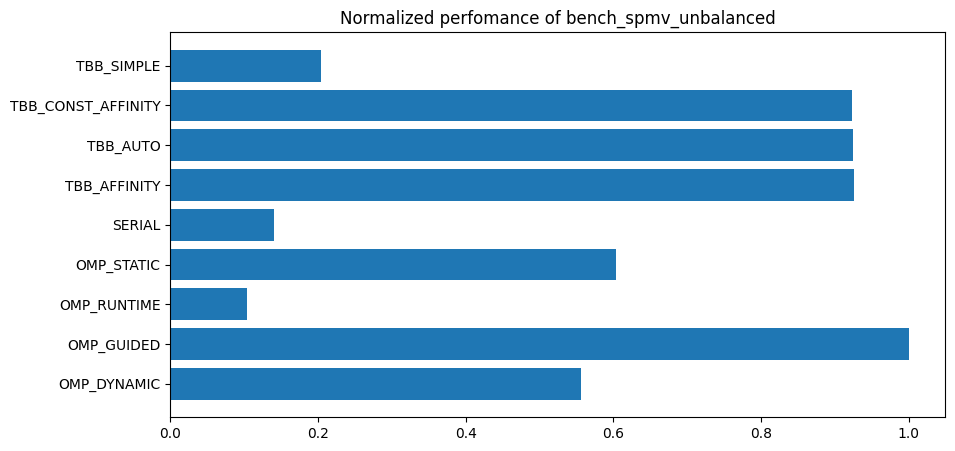

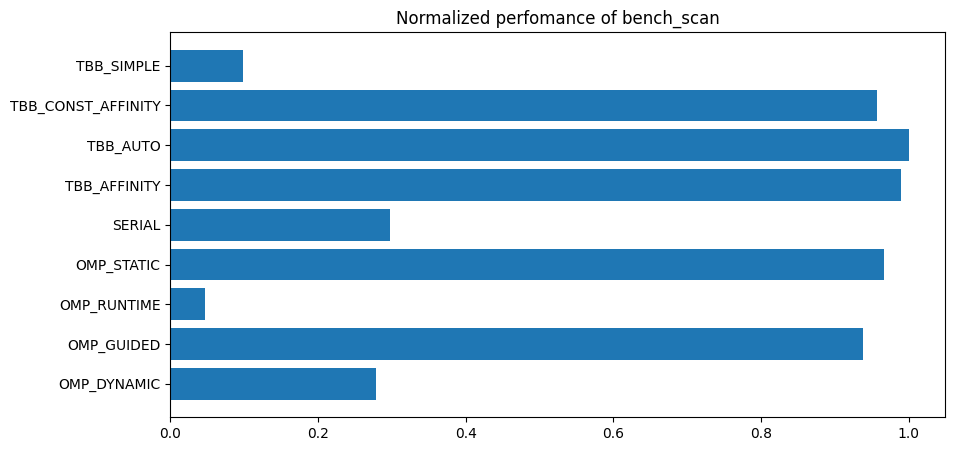

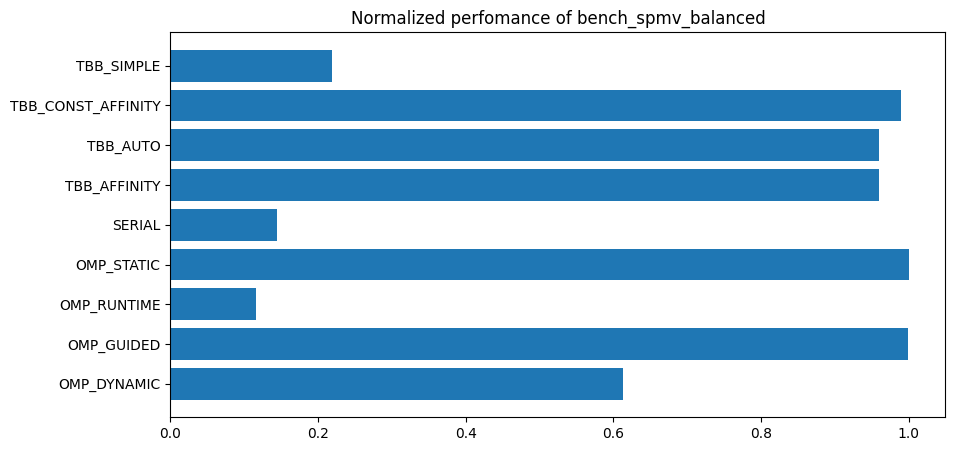

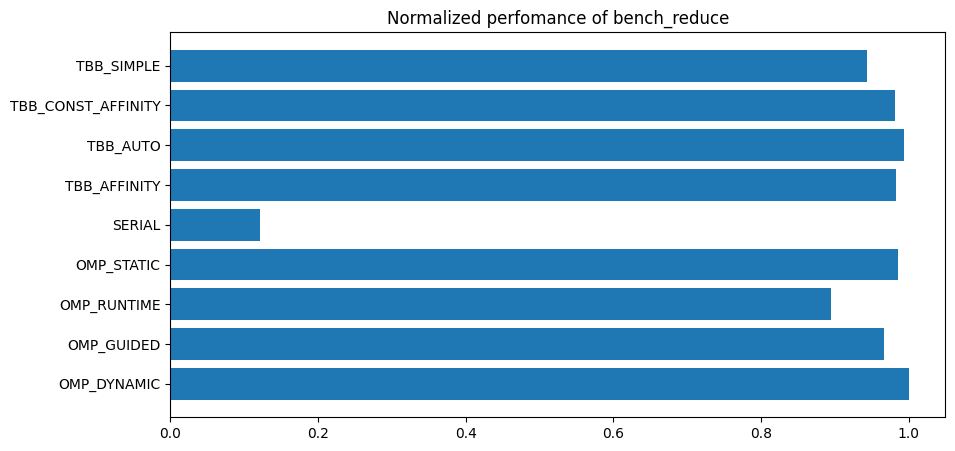

In [5]:
for bench_type, bench in benchmarks_by_type.items():
    plot_benchmark(bench, bench_type)